# project and related

<font size = "4">) # Density based Clustering -- total revenue and TOTAL_EXPENDITURE and 
TOTAL_EXPENDITURE and INSTRUCTION_EXPENDITURE </font>

In [ ]:
#education data for project

In [97]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [98]:
df = pd.read_csv('states_all.csv')

#df.columns=['PRIMARY_KEY','STATE','YEAR','ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']
df = df.fillna(0)
df[:5]
display(df[:5])

#data = df.iloc[:,4:8].values

# total revenue and TOTAL_EXPENDITURE
data = df.iloc[:,[False, False, False, False,True, False, False, False,True, False, False, False,False, False, False, False
                 ,False, False, False, False,False, False, False, False, False]].values 
#total revenue and INSTRUCTION_EXPENDITURE
data1 = df.iloc[:,8:10].values 

print (data)
data1


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,0.0,0.0,731634.0,208.327876,252.187522,207.963517,0.000000
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,0.0,0.0,122487.0,0.000000,0.000000,0.000000,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,0.0,0.0,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,0.0,0.0,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,0.0,0.0,5254844.0,208.398961,260.892247,196.764414,0.000000


[[2678885. 2653798.]
 [1049591.  972488.]
 [3258079. 3401580.]
 ...
 [      0.       0.]
 [      0.       0.]
 [      0.       0.]]


array([[2653798., 1481703.],
       [ 972488.,  498362.],
       [3401580., 1435908.],
       ...,
       [      0.,       0.],
       [      0.,       0.],
       [      0.,       0.]])

In [99]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1918.000000,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,...,1918.000000,1918.000000,1918.000000,1.918000e+03,1.918000e+03,1.918000e+03,1918.000000,1918.000000,1918.000000,1918.000000
mean,2001.947341,5.855427e+05,6.050629e+06,5.103855e+05,2.807754e+06,2.732490e+06,6.119895e+06,3.169559e+06,1.783263e+06,2.743795e+05,...,58852.836809,57950.922315,49709.520855,3.073586e+05,1.575057e+05,7.776842e+05,65.493506,77.092300,60.716202,68.326701
std,9.061480,9.592541e+05,1.050602e+07,1.002873e+06,4.944350e+06,4.877985e+06,1.069965e+07,5.608117e+06,3.015788e+06,4.745195e+05,...,77760.934586,75898.758516,65594.986876,5.709361e+05,2.840343e+05,1.026946e+06,105.466177,124.741247,98.111187,115.615632
min,1986.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,10048.250000,9945.500000,8782.250000,0.000000e+00,0.000000e+00,1.316675e+05,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,1.968790e+05,2.182828e+06,1.888875e+05,1.147705e+06,7.133175e+05,2.162550e+06,1.162840e+06,6.332085e+05,8.695150e+04,...,37859.000000,37301.000000,33552.000000,5.919400e+04,3.840700e+04,4.967640e+05,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,8.244928e+05,7.286372e+06,5.812615e+05,3.473126e+06,3.080548e+06,7.451784e+06,3.749266e+06,2.157683e+06,3.683862e+05,...,71910.250000,72099.000000,64710.000000,4.338988e+05,2.085818e+05,9.558178e+05,220.308571,264.855277,207.740113,250.709414
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.420961,300.568235,236.773867,280.499130


In [100]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data)
print(model)   

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [101]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({-1: 1275, 0: 643})
               0           1
0      2678885.0   2653798.0
1      1049591.0    972488.0
2      3258079.0   3401580.0
3      1711959.0   1743022.0
4     26260025.0  27138832.0
...          ...         ...
1270  16259274.0  16497520.0
1271  14964364.0  15253296.0
1272   3391579.0   3366566.0
1273  11697466.0  11787535.0
1274   2044669.0   2034229.0

[1275 rows x 2 columns]


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

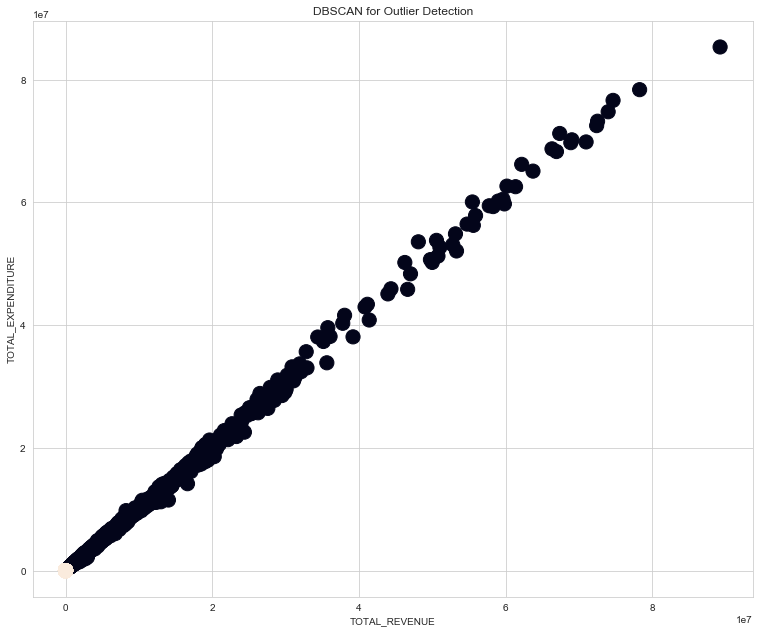

In [146]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,0], data[:,1], c=colors, s=200)
ax.set_xlabel('TOTAL_REVENUE')
ax.set_ylabel('TOTAL_EXPENDITURE')
plt.title('DBSCAN for Outlier Detection for total revenue and expenditure')

In [103]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data1)
print(model)   

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [104]:
outliers_df = pd.DataFrame(data1)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({-1: 1275, 0: 643})
               0           1
0      2653798.0   1481703.0
1       972488.0    498362.0
2      3401580.0   1435908.0
3      1743022.0    964323.0
4     27138832.0  14358922.0
...          ...         ...
1270  16497520.0   8944614.0
1271  15253296.0   7087365.0
1272   3366566.0   1804235.0
1273  11787535.0   5760418.0
1274   2034229.0    921494.0

[1275 rows x 2 columns]


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

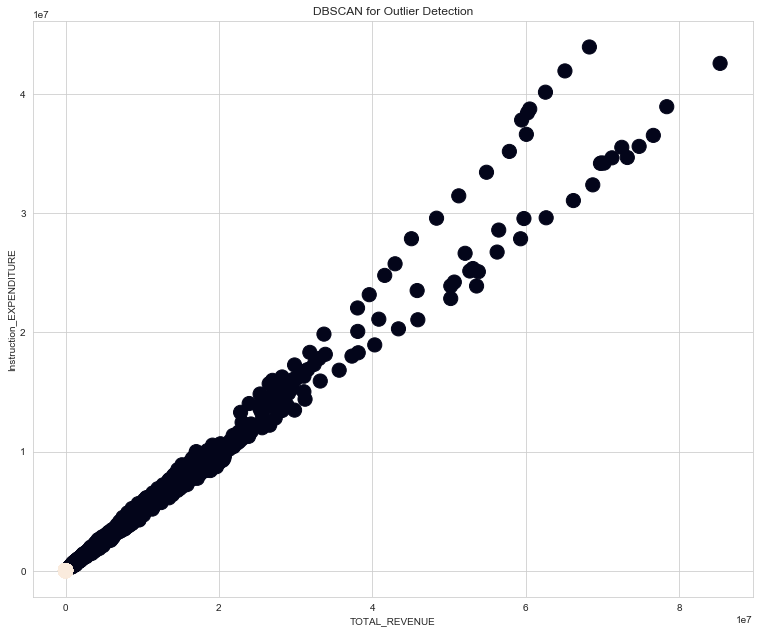

In [105]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data1[:,0], data1[:,1], c=colors, s=200)
ax.set_xlabel('TOTAL_EXPENDITURE')
ax.set_ylabel('Instruction_EXPENDITURE')
plt.title('DBSCAN for Outlier Detection for total and instruction-expenditure')